# Limpieza de datos

Para la limpieza de datos tenemos que isdentificar la proporción de registros faltantes para saber si podemos eliminarlos por completo o si les colocamos un valor basado en una media o moda.

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
%store df

Stored 'df' (DataFrame)


In [15]:
nulos_totales = df.isnull().sum()
nulos_pct = (nulos_totales / len(df)) * 100

nulos_df = pd.DataFrame({"Total nulos:": nulos_totales,
                         "% de nulos": nulos_pct.round(2)})

nulos_df

,Total nulos:,% de nulos
ID,10,1.33
Reason for absence,11,1.46
Month of absence,14,1.86
Day of the week,10,1.33
Seasons,5,0.66
Transportation expense,14,1.86
Distance from Residence to Work,15,1.99
Service time,9,1.19
Age,7,0.93
Work load Average/day,17,2.25


In [16]:
# quitando la columna de mixed_type
df.drop(columns=["ID", "mixed_type_col"], inplace=True)

In [17]:
columnas_no_categoricas = ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']

columnas_categoricas = df.drop(columns=columnas_no_categoricas).columns
columnas_categoricas

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker'],
      dtype='object')

In [18]:
# colocando la media en valores NaN en variables que no son consideradas categoricas

df[columnas_no_categoricas] = df[columnas_no_categoricas].apply(lambda col: col.fillna(col.mean()))

In [19]:
# Función para quitar outliers usando IQR
def quitar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]


for col in columnas_no_categoricas:
    df = quitar_outliers(df, col)

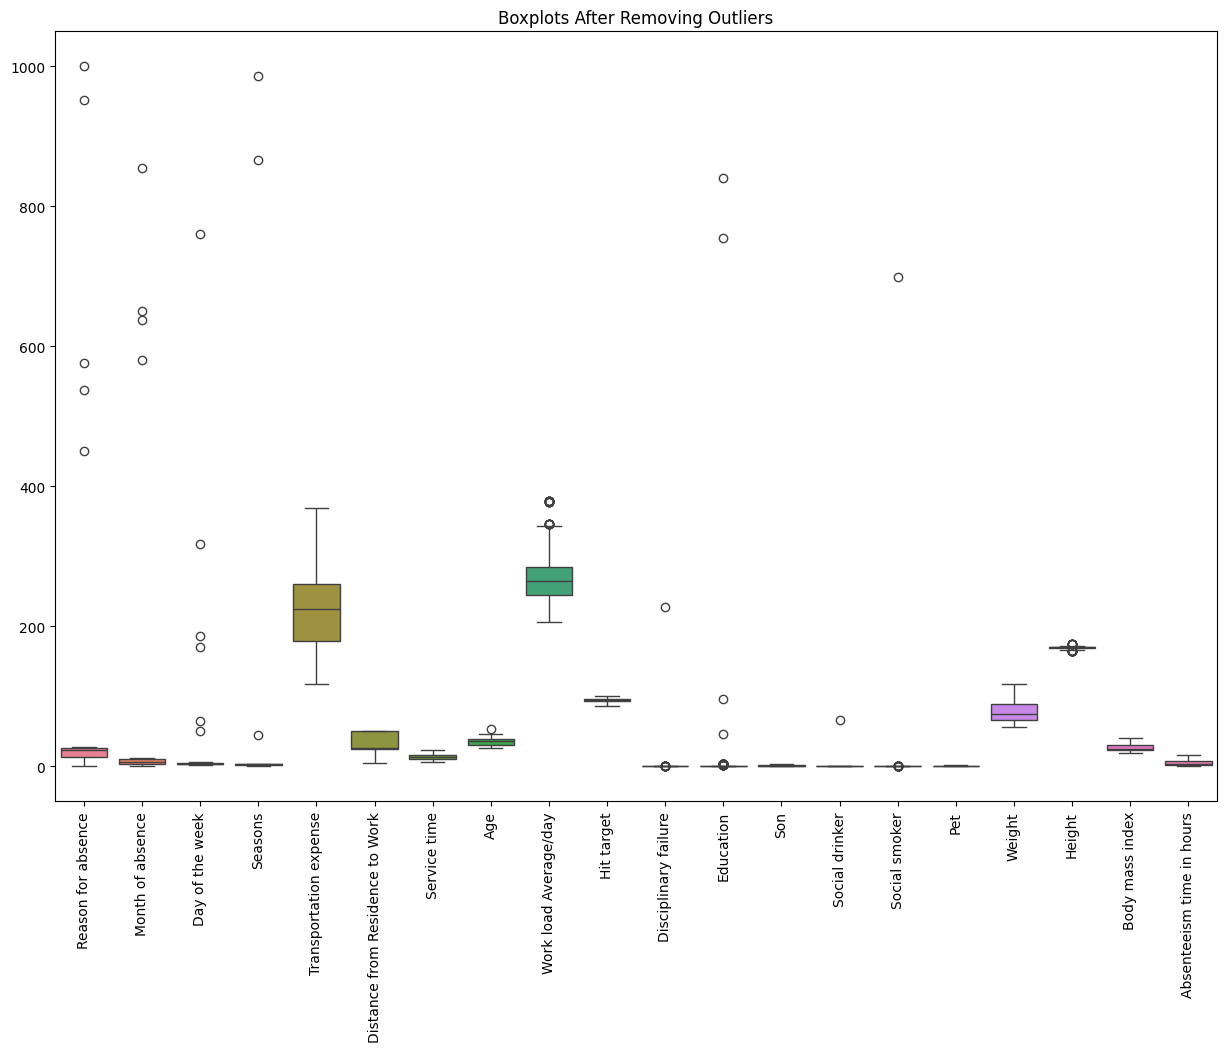

In [20]:
# Nuevo boxplot para la distribucón de las variables sin outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots After Removing Outliers")
plt.show()

Vemos que en las variables categoricas siguen existiendo oultliers, tenemos que quitarlos manualmente para poder garantizar la calidad de los datos.

In [21]:
print("Lista de variables categoricas:\n-", "\n-".join(columnas_categoricas), sep="")

Lista de variables categoricas:
-Reason for absence
-Month of absence
-Day of the week
-Seasons
-Disciplinary failure
-Education
-Social drinker
-Social smoker


In [22]:
df["Reason for absence"].unique()

array([  26.,   23.,    7.,   22.,    1.,   11.,   14.,   21.,   18.,
         24.,   nan,    0.,   19.,   28.,   13.,   27.,  538.,   17.,
          8.,  952.,   12.,   10.,   25.,    6.,   15.,    4.,    3.,
          5.,    9.,  576., 1000.,  450.,   16.])

In [23]:
print("Antes de reemplazar por moda", df["Reason for absence"].unique())
razones_validas = list(range(1, 22))
moda_mes = df[df["Reason for absence"].isin(razones_validas)]["Reason for absence"].mode()[0]

df["Reason for absence"] = df["Reason for absence"].apply(lambda x: moda_mes if x not in razones_validas else x)

print("Después de reemplazar por moda", df["Reason for absence"].unique())

Antes de reemplazar por moda [  26.   23.    7.   22.    1.   11.   14.   21.   18.   24.   nan    0.
   19.   28.   13.   27.  538.   17.    8.  952.   12.   10.   25.    6.
   15.    4.    3.    5.    9.  576. 1000.  450.   16.]
Después de reemplazar por moda [13.  7.  1. 11. 14. 21. 18. 19. 17.  8. 12. 10.  6. 15.  4.  3.  5.  9.
 16.]


In [24]:
print("Antes de reemplazar por moda", df["Seasons"].unique())
temp_validas = list(range(1, 5))
moda_mes = df[df["Seasons"].isin(temp_validas)]["Seasons"].mode()[0]

df["Seasons"] = df["Seasons"].apply(lambda x: moda_mes if x not in temp_validas else x)

print("Después de reemplazar por moda", df["Seasons"].unique())


Antes de reemplazar por moda [  1. 866.   4. 986.   2.  nan   3.  45.]
Después de reemplazar por moda [1. 4. 2. 3.]


In [25]:
print("Antes de reemplazar por moda", df["Month of absence"].unique())
meses_validos = list(range(1, 13))
moda_mes = df[df["Month of absence"].isin(meses_validos)]["Month of absence"].mode()[0]

df["Month of absence"] = df["Month of absence"].apply(lambda x: moda_mes if x not in meses_validos else x)

print("Después de reemplazar por moda", df["Month of absence"].unique())

Antes de reemplazar por moda [  7.   8.   9.  10.  nan  11.  12.   1.   2.   3.   4.   5.   6. 650.
 855. 580. 638.   0.]
Después de reemplazar por moda [ 7.  8.  9. 10.  3. 11. 12.  1.  2.  4.  5.  6.]


In [26]:
print("Antes de reemplazar por moda", df["Day of the week"].unique())
dias_validos = list(range(1, 8))
moda_mes = df[df["Day of the week"].isin(dias_validos)]["Day of the week"].mode()[0]

df["Day of the week"] = df["Day of the week"].apply(lambda x: moda_mes if x not in dias_validos else x)

print("Después de reemplazar por moda", df["Day of the week"].unique())

Antes de reemplazar por moda [  3.   4.   5.  65.  nan   6.   2. 318.  50. 761. 171. 186.]
Después de reemplazar por moda [3. 4. 5. 6. 2.]


In [27]:
df["Education"].unique()

array([  1.,   3.,  46.,   2.,  97., 840.,  nan, 755.])

In [28]:
print("Antes de reemplazar por moda", df["Education"].unique())
edu_validos = list(range(1, 5))
moda_mes = df[df["Education"].isin(edu_validos)]["Education"].mode()[0]

df["Education"] = df["Education"].apply(lambda x: moda_mes if x not in edu_validos else x)

print("Después de reemplazar por moda", df["Education"].unique())

Antes de reemplazar por moda [  1.   3.  46.   2.  97. 840.  nan 755.]
Después de reemplazar por moda [1. 3. 2.]


In [29]:
print("Disciplinary failure:", df["Disciplinary failure"].unique())
print("Social drinker:", df["Social drinker"].unique())
print("Social smoker:", df["Social smoker"].unique())

Disciplinary failure: [  0.  nan   1. 228.]
Social drinker: [ 1.  0. nan 66.]
Social smoker: [  0.   1.  nan 699.]


In [30]:
valores_validos = list(range(0, 2))
moda_disp = df[df["Disciplinary failure"].isin(edu_validos)]["Disciplinary failure"].mode()[0]
moda_drink = df[df["Social drinker"].isin(edu_validos)]["Social drinker"].mode()[0]
moda_smoke = df[df["Social smoker"].isin(edu_validos)]["Social smoker"].mode()[0]

df["Disciplinary failure"] = df["Disciplinary failure"].apply(lambda x: moda_disp if x not in valores_validos else x)
df["Social drinker"] = df["Social drinker"].apply(lambda x: moda_disp if x not in valores_validos else x)
df["Social smoker"] = df["Social smoker"].apply(lambda x: moda_disp if x not in valores_validos else x)

print("Después de reemplazo por moda")
print("Disciplinary failure:", df["Disciplinary failure"].unique())
print("Social drinker:", df["Social drinker"].unique())
print("Social smoker:", df["Social smoker"].unique())

Después de reemplazo por moda
Disciplinary failure: [0. 1.]
Social drinker: [1. 0.]
Social smoker: [0. 1.]


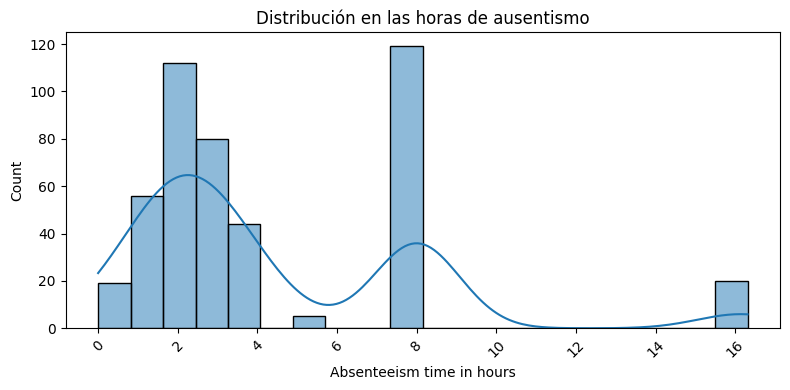

In [31]:
# Distribución de horas de ausentismo
plt.figure(figsize=(8, 4))
sns.histplot(df['Absenteeism time in hours'], kde=True, bins=20)
plt.xticks(rotation=45)
plt.title("Distribución en las horas de ausentismo")
plt.tight_layout()
plt.show()

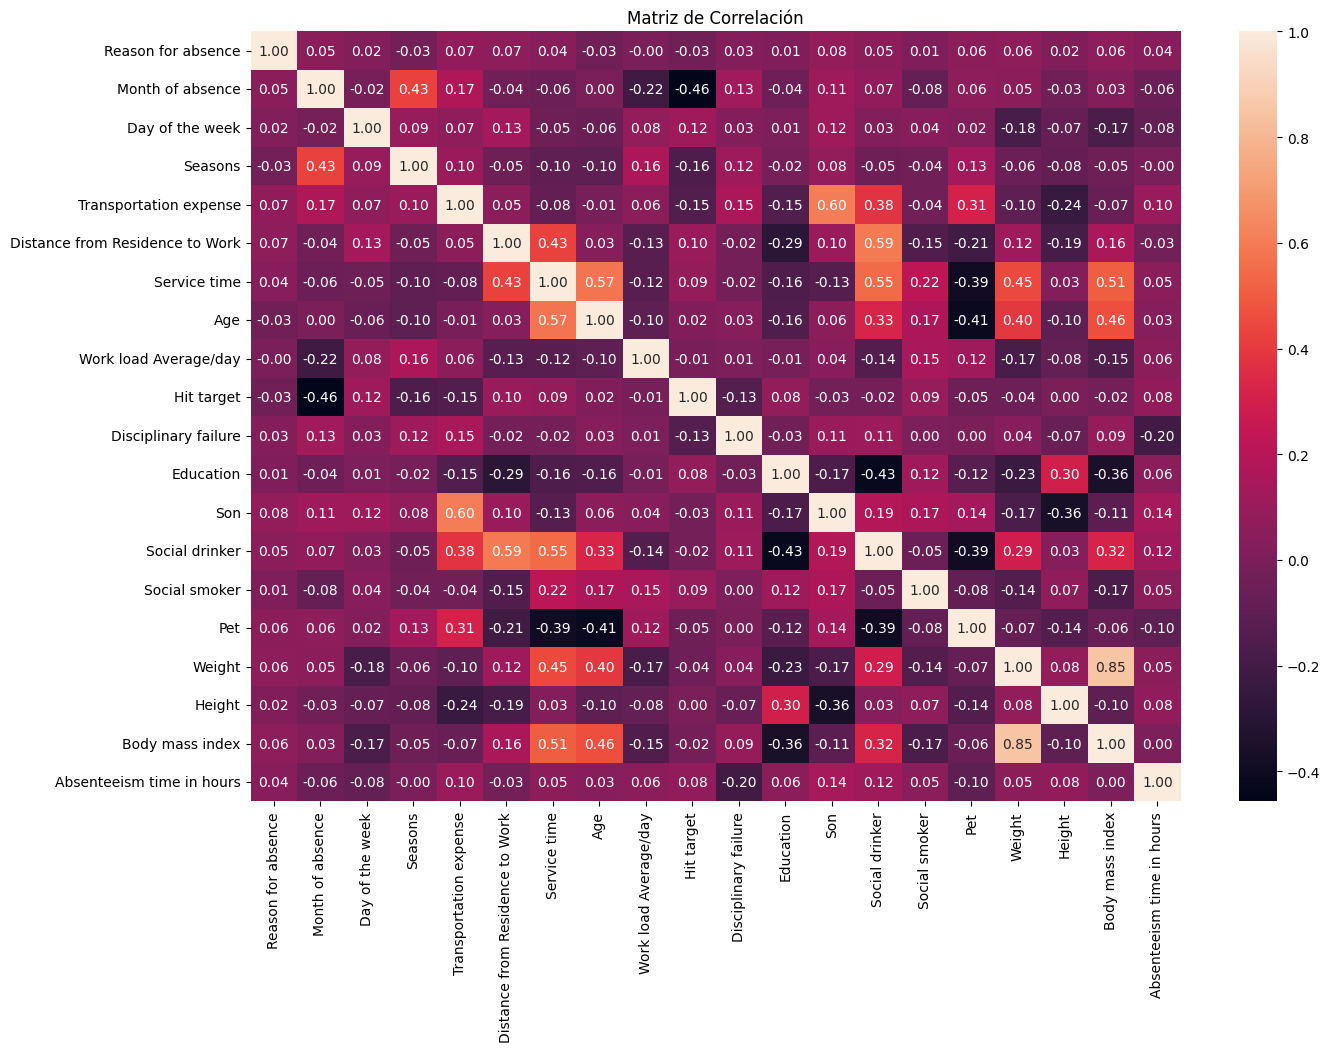

In [32]:
# Realizando heatmap de correlación
plt.figure(figsize=(15, 10))
mat_corr = df.corr()
sns.heatmap(mat_corr, annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Ahora podemos ver una correlación más clara entre algunas variables como lo son:
- "Service time" y "Age"
- "Month of absence" y "Season"
- "Son" y "Transportation expense"
- "Service time" y "body mass index"
- "Age" y "Weight"
- "Age" y "body mass index"
- "social drinker" y "service time"
- "Weight" y "body masss index"

In [33]:
%store df

Stored 'df' (DataFrame)
